# Capstone Project : Retail Sales Case Study

# Data Quality and Check (Task 1)
1. Create a consolidated view of data by joining the data present in three files.

In [50]:
import pandas as pd
import json
import seaborn as sns
# Loading the datasets
demographic_df  = pd.read_csv("/Users/akhilnair/Downloads/demographics.txt", delimiter='\t')
demographic_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [51]:
# Loading the JSON data
with open("/Users/akhilnair/Downloads/behaviour.json") as behaviour_file:
    behaviour_data = json.load(behaviour_file)
with open("/Users/akhilnair/Downloads/campaign.json") as campaign_file:
    campaign_data = json.load(campaign_file)

In [52]:
# Converting the JSON data to DataFrames
behaviour_list = [list(item.values())[0] for item in behaviour_data]
behaviour_ids = [list(item.keys())[0].replace('ID_', '') for item in behaviour_data]
behaviour_df = pd.DataFrame(behaviour_list)
behaviour_df['ID'] = behaviour_ids
behaviour_df

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ID
0,0,189,104,379,111,189,218,1,4,4,6,1,1826
1,0,464,5,64,7,0,37,1,7,3,7,5,1
2,0,134,11,59,15,2,30,1,3,2,5,2,10476
3,0,10,0,1,0,0,0,1,1,0,2,7,1386
4,0,6,16,24,11,0,34,2,3,1,2,7,5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,99,372,18,126,47,48,78,2,5,2,11,4,10142
2236,99,5,10,13,3,8,16,1,1,0,3,8,5263
2237,99,185,2,88,15,5,14,2,6,1,5,8,22
2238,99,267,38,701,149,165,63,1,5,4,10,3,528


In [53]:
campaign_list = [list(item.values())[0] for item in campaign_data]
campaign_ids = [list(item.keys())[0].replace('ID_', '') for item in campaign_data]
campaign_df = pd.DataFrame(campaign_list)
campaign_df['ID'] = campaign_ids
campaign_df

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,ID
0,0,0,0,0,0,1,0,1826
1,0,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,10476
3,0,0,0,0,0,0,0,1386
4,0,0,1,0,0,1,0,5371
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,10142
2236,0,0,0,0,0,0,0,5263
2237,0,0,0,0,0,0,0,22
2238,0,0,0,0,0,0,0,528


In [54]:
# Converting ID columns to string type for consistent joining
demographic_df['ID'] = demographic_df['ID'].astype(str)
behaviour_df['ID'] = behaviour_df['ID'].astype(str)
campaign_df['ID'] = campaign_df['ID'].astype(str)


# Merging the datasets on ID
consolidated_df = demographic_df.merge(behaviour_df, on='ID').merge(campaign_df, on='ID')

# Removing extra spaces in column names
consolidated_df.columns = consolidated_df.columns.str.strip()
consolidated_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [55]:
# Handle missing values
consolidated_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64

In [56]:
# Cleaning and converting the Income column
consolidated_df['Income'] = consolidated_df['Income'].replace('[\$,]', '', regex=True).astype(float)
consolidated_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [57]:
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Country              2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [58]:
# Checking for duplicates
duplicates = consolidated_df.duplicated().sum()
duplicates

0

In [59]:
# Creating a data quality report for continuous variables
continuous_vars = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth'
]

data_quality_report = pd.DataFrame(columns=[
    'Variable', 'MissingPercentage', 'ZeroPercentage', 'Mean', 
    '25thPercentile', '50thPercentile', '75thPercentile', '90thPercentile', 
    '95thPercentile', 'Min', 'Max'
])

for var in continuous_vars:
    missing_percentage = consolidated_df[var].isnull().mean() * 100
    zero_percentage = (consolidated_df[var] == 0).mean() * 100
    mean = consolidated_df[var].mean()
    percentiles = consolidated_df[var].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).values
    min_val = consolidated_df[var].min()
    max_val = consolidated_df[var].max()
    
    data_quality_report = pd.concat([data_quality_report, pd.DataFrame({
        'Variable': [var],
        'MissingPercentage': [missing_percentage],
        'ZeroPercentage': [zero_percentage],
        'Mean': [mean],
        '25thPercentile': [percentiles[0]],
        '50thPercentile': [percentiles[1]],
        '75thPercentile': [percentiles[2]],
        '90thPercentile': [percentiles[3]],
        '95thPercentile': [percentiles[4]],
        'Min': [min_val],
        'Max': [max_val]
    })], ignore_index=True)

In [60]:
data_quality_report

,Variable,MissingPercentage,ZeroPercentage,Mean,25thPercentile,50thPercentile,75thPercentile,90thPercentile,95thPercentile,Min,Max
0,Year_Birth,0.000000,0.000000,1968.805804,1959.00,1970.0,1977.00,1984.0,1988.00,1893,1996
1,Income,1.071429,0.000000,52247.251354,35303.00,51381.5,68522.00,79844.0,84130.00,1730.0,666666.0
2,Kidhome,0.000000,57.723214,0.444196,0.00,0.0,1.00,1.0,1.00,0,2
3,Teenhome,0.000000,51.696429,0.506250,0.00,0.0,1.00,1.0,1.00,0,2
4,Recency,0.000000,1.250000,49.109375,24.00,49.0,74.00,89.0,94.00,0,99
5,MntWines,0.000000,0.580357,303.935714,23.75,173.5,504.25,822.1,1000.00,0,1493
6,MntFruits,0.000000,17.857143,26.302232,1.00,8.0,33.00,83.0,123.00,0,199
7,MntMeatProducts,0.000000,0.044643,166.950000,16.00,67.0,232.00,499.0,687.10,0,1725
8,MntFishProducts,0.000000,17.142857,37.525446,3.00,12.0,50.00,120.0,168.05,0,259
9,MntSweetProducts,0.000000,18.705357,27.062946,1.00,8.0,33.00,89.0,126.00,0,263


In [61]:
# Univariate analysis for categorical variables

# List of categorical columns
categorical_vars = ['Education', 'Marital_Status', 'Country']

# DataFrame to store the categorical variable report
categorical_report = pd.DataFrame(columns=['Variable', 'MissingPercentage', 'UniqueValues'])

for var in categorical_vars:
    missing_percentage = consolidated_df[var].isnull().mean() * 100
    unique_values = consolidated_df[var].nunique()
    
    categorical_report = pd.concat([categorical_report, pd.DataFrame({
        'Variable': [var],
        'MissingPercentage': [missing_percentage],
        'UniqueValues': [unique_values]
    })], ignore_index=True)

In [62]:
categorical_report

,Variable,MissingPercentage,UniqueValues
0,Education,0.0,5
1,Marital_Status,0.0,8
2,Country,0.0,8


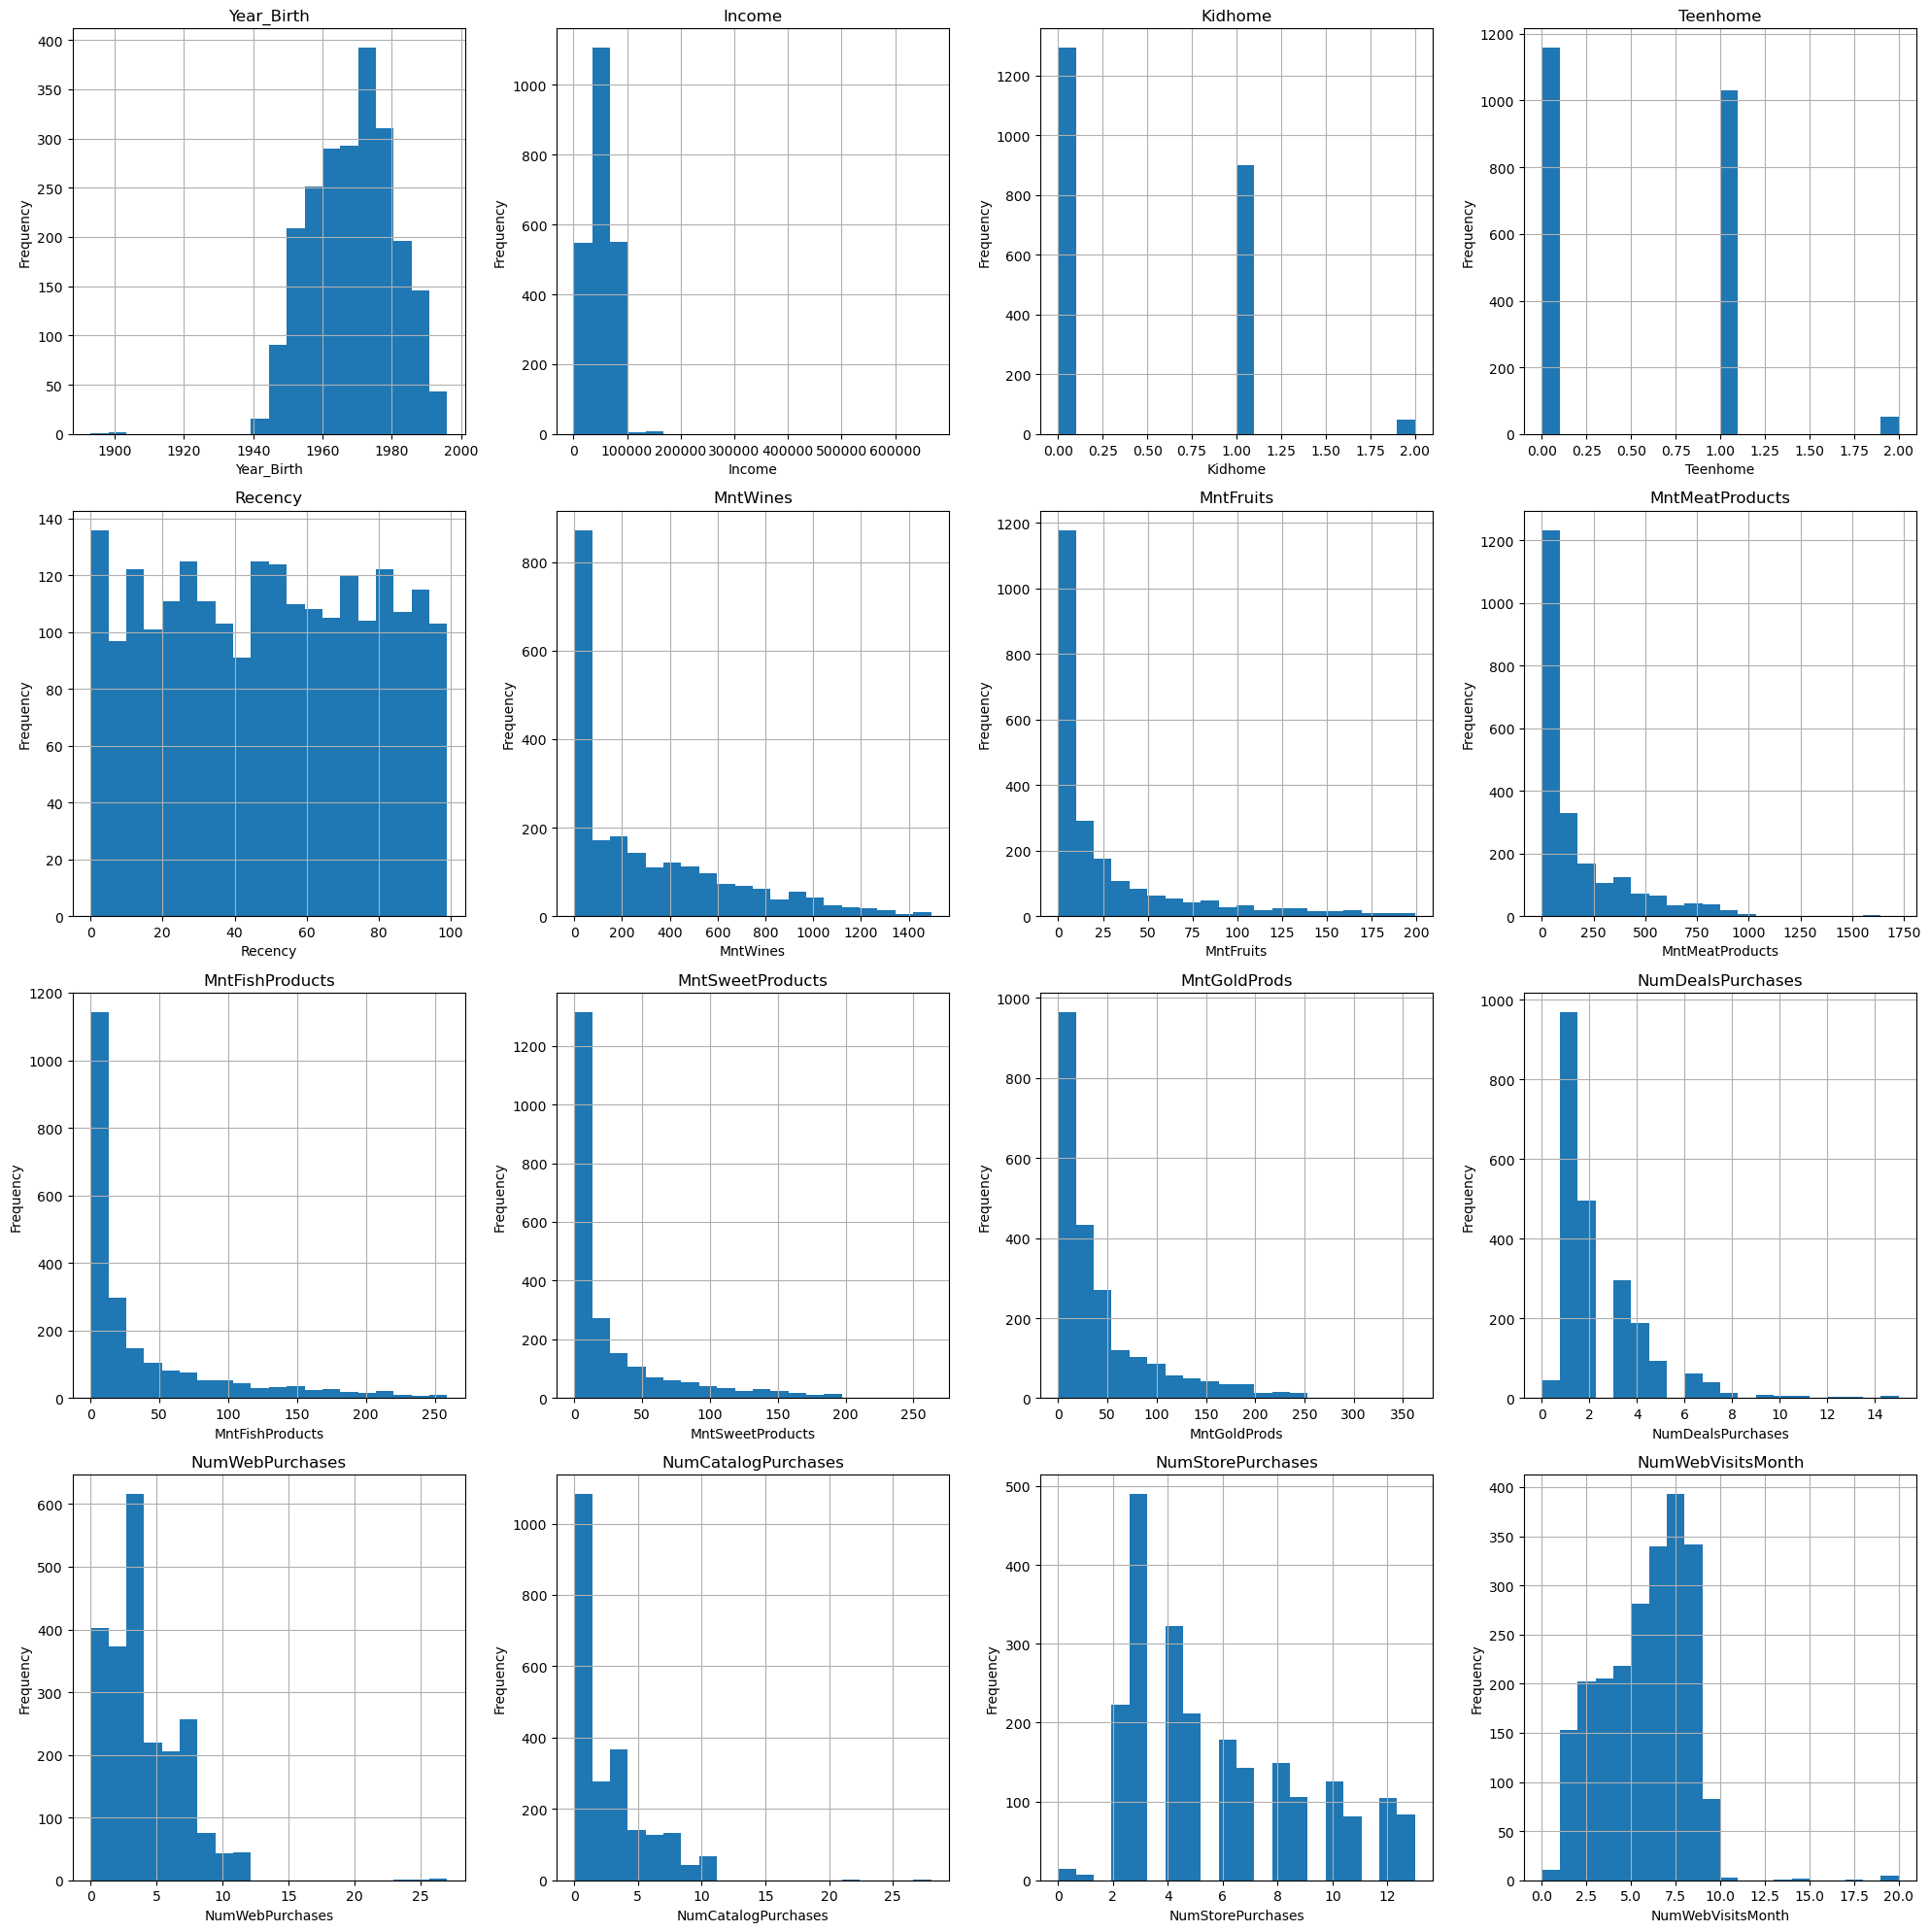

In [63]:
import matplotlib.pyplot as plt

# Ploting histograms for continuous variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, var in enumerate(continuous_vars):
    consolidated_df[var].hist(ax=axes[idx], bins=20)
    axes[idx].set_title(var)
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

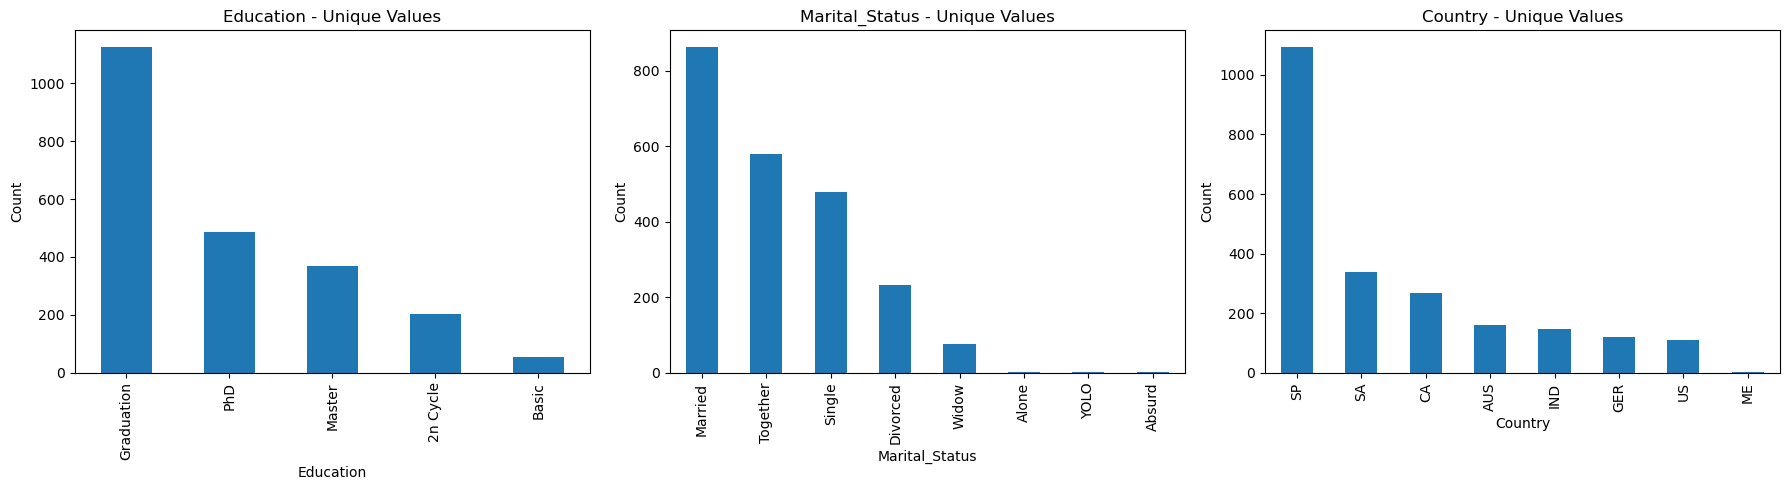

In [64]:
# Ploting bar plots for unique values in categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for idx, var in enumerate(categorical_vars):
    value_counts = consolidated_df[var].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{var} - Unique Values')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

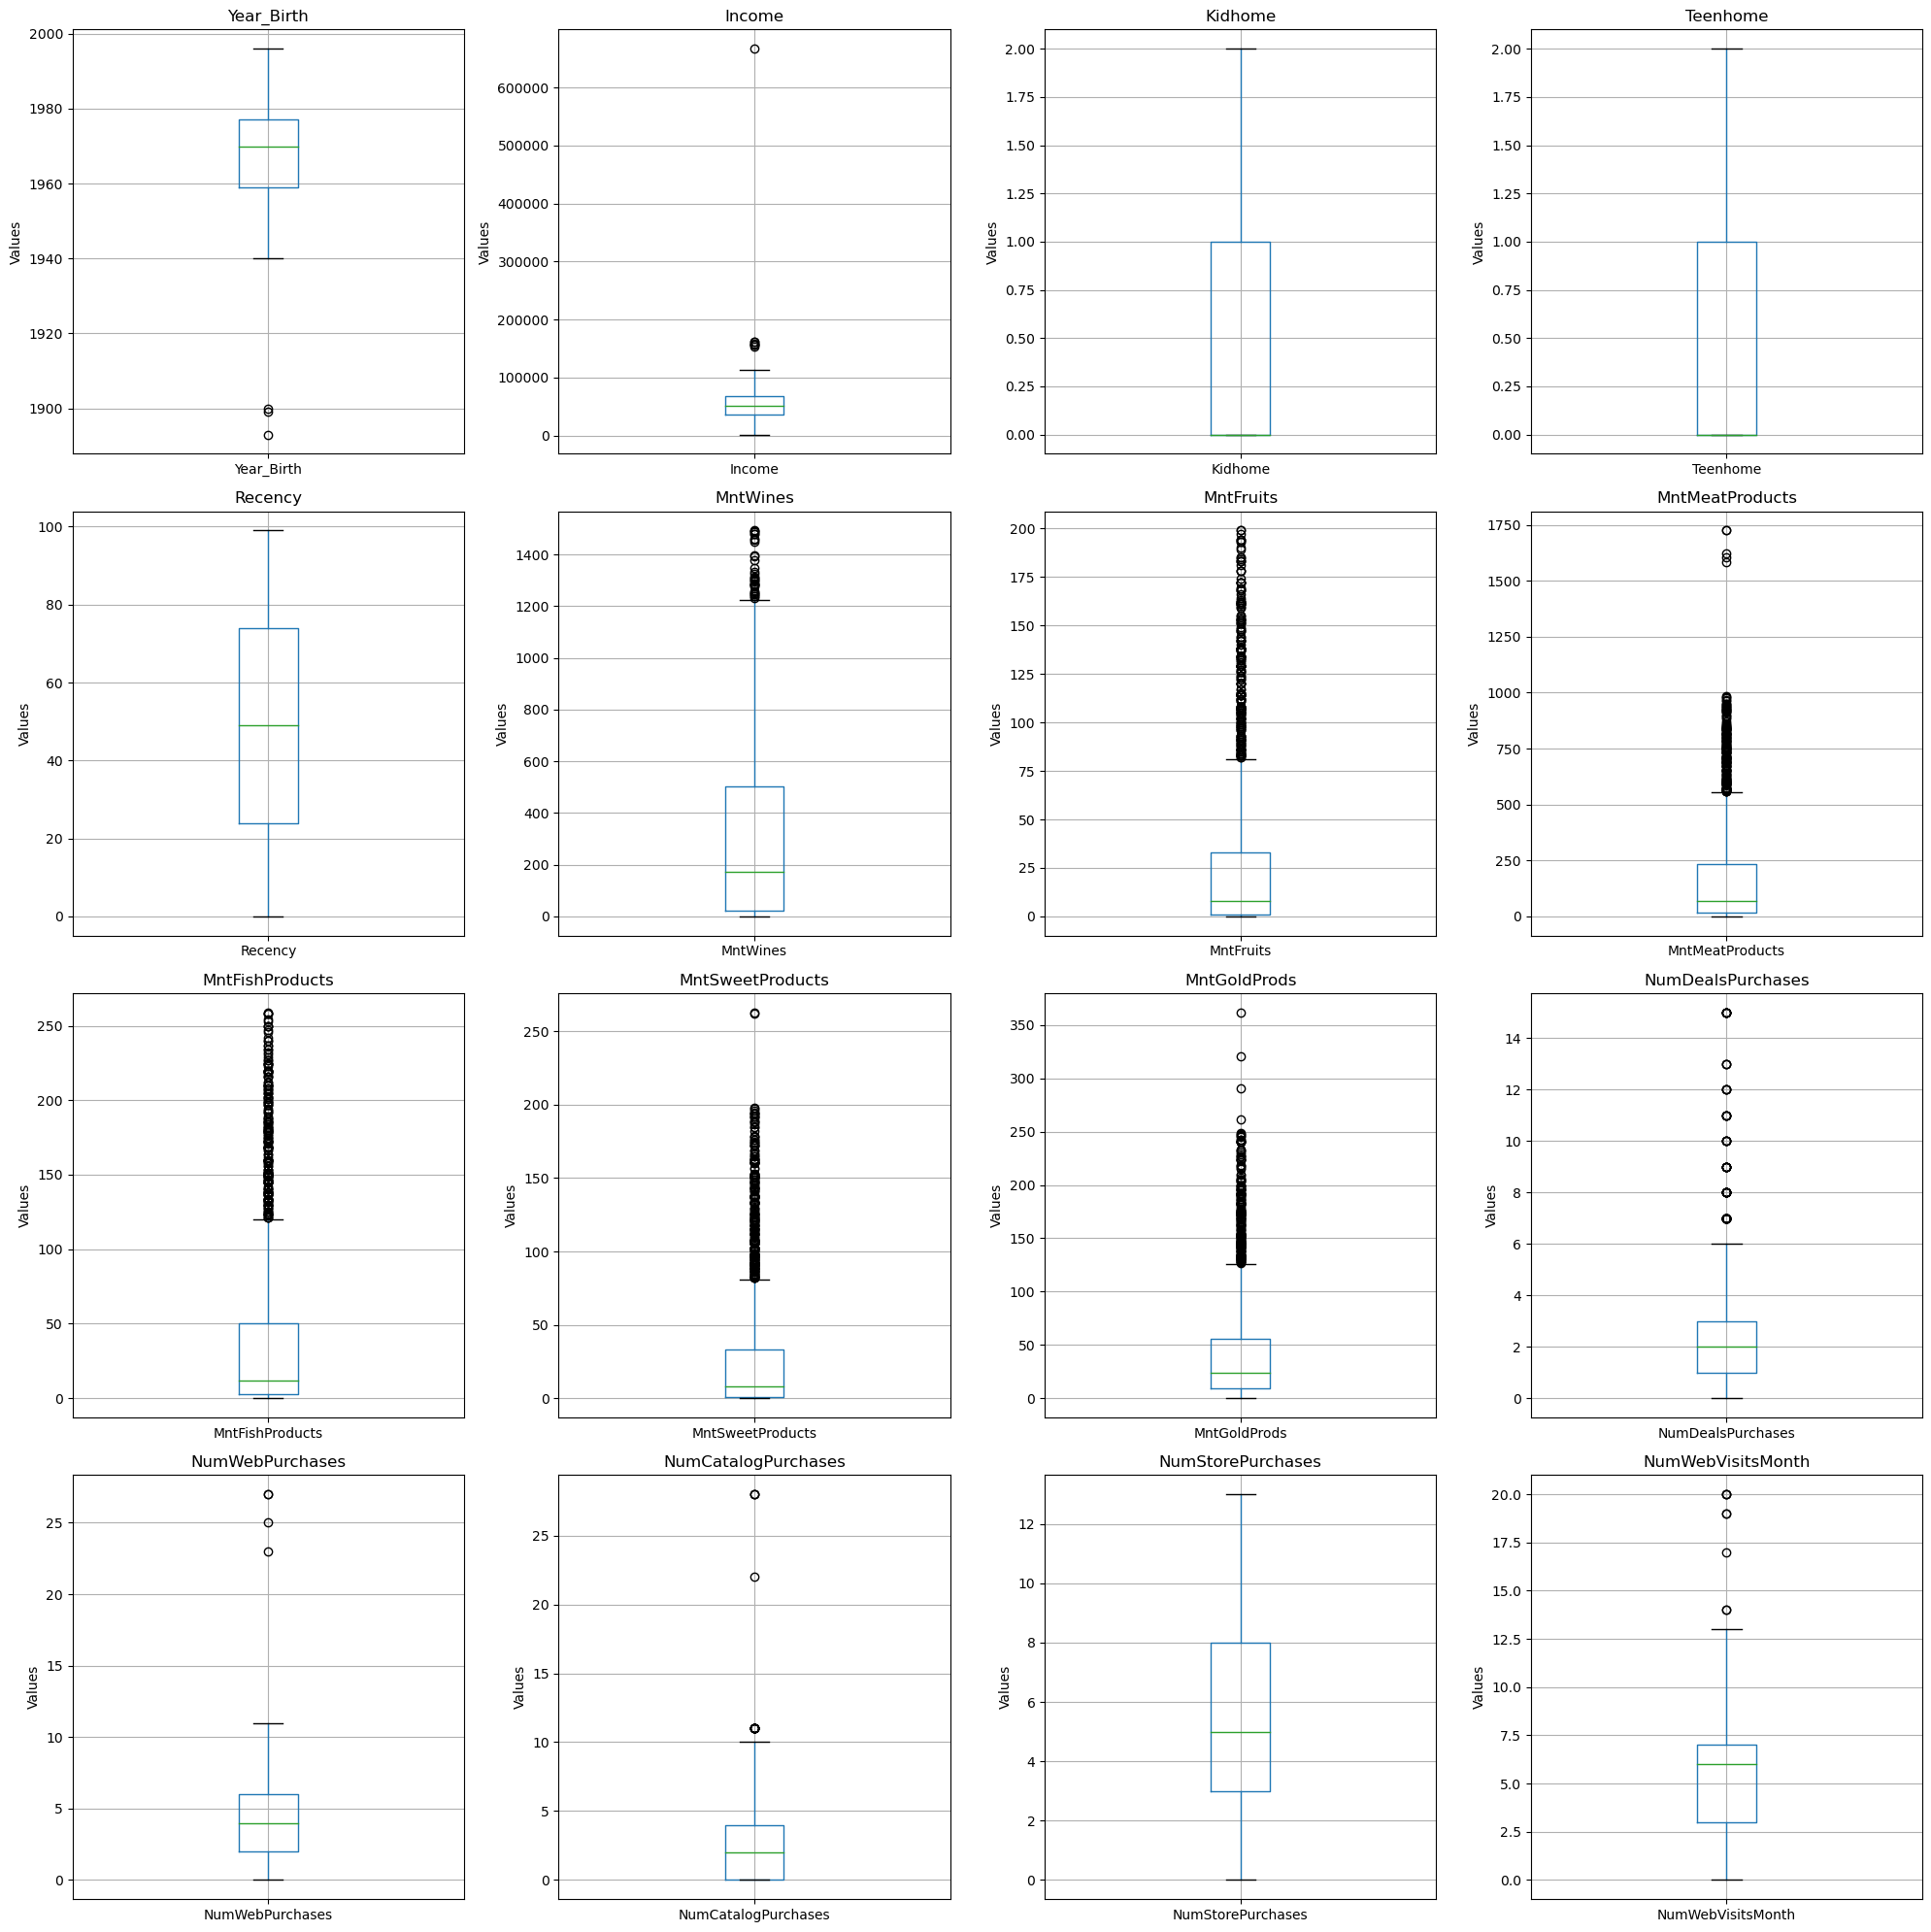

In [65]:
# Ploting box plots for continuous variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, var in enumerate(continuous_vars):
    consolidated_df.boxplot(column=var, ax=axes[idx])
    axes[idx].set_title(var)
    axes[idx].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [66]:
# Checking for extreme values in specific continuous variables like 'Income', 'Recency', and spending on various categories

# Define the variables of interest
variables_of_interest = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Calculating descriptive statistics for these variables to identify extreme values
extreme_values_report = pd.DataFrame(columns=[
    'Variable', 'Mean', 'StandardDeviation', 'Min', '25thPercentile', 
    '50thPercentile', '75thPercentile', 'Max', 'UpperFence'
])

for var in variables_of_interest:
    mean = consolidated_df[var].mean()
    std_dev = consolidated_df[var].std()
    min_val = consolidated_df[var].min()
    percentiles = consolidated_df[var].quantile([0.25, 0.5, 0.75]).values
    max_val = consolidated_df[var].max()
    iqr = percentiles[2] - percentiles[0]
    upper_fence = percentiles[2] + 1.5 * iqr
    
    extreme_values_report = pd.concat([extreme_values_report, pd.DataFrame({
        'Variable': [var],
        'Mean': [mean],
        'StandardDeviation': [std_dev],
        'Min': [min_val],
        '25thPercentile': [percentiles[0]],
        '50thPercentile': [percentiles[1]],
        '75thPercentile': [percentiles[2]],
        'Max': [max_val],
        'UpperFence': [upper_fence]
    })], ignore_index=True)

extreme_values_report

,Variable,Mean,StandardDeviation,Min,25thPercentile,50thPercentile,75thPercentile,Max,UpperFence
0,Income,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0,118350.5
1,Recency,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,149.0
2,MntWines,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,1225.0
3,MntFruits,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,81.0
4,MntMeatProducts,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,556.0
5,MntFishProducts,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,120.5
6,MntSweetProducts,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0,81.0
7,MntGoldProds,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0,126.5


Income:
The maximum value is significantly higher than the upper fence, indicating the presence of extreme values.

Recency:
The maximum value of 99 days is within the upper fence, indicating no extreme values.

MntWines:
The maximum value of 1,493 is higher than the upper fence, indicating potential extreme values.

MntFruits:
The maximum value of 199 is higher than the upper fence, indicating potential extreme values.

MntMeatProducts:
The maximum value of 1,725 is higher than the upper fence, indicating potential extreme values.

MntFishProducts:
The maximum value of 259 is higher than the upper fence, indicating potential extreme values.

MntSweetProducts:
The maximum value of 263 is higher than the upper fence, indicating potential extreme values.

MntGoldProds:
The maximum value of 362 is higher than the upper fence, indicating potential extreme values.

# Business Analysis and Hypothesis (Task 2)
1. Generate and check hypothesis around Amount Spent on different categories and
response rate in different marketing campaigns.



Hypothesis Testing: Amount Spent and Response Rates

Hypotheses:
* Hypothesis 1: Higher spending in specific categories (e.g., wines, meat products) correlates with a higher likelihood of responding to marketing campaigns.
* Hypothesis 2: There are significant differences in response rates across different marketing campaigns.

In [67]:
# Calculating total amount spent
consolidated_df['TotalSpent'] = consolidated_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [68]:
import scipy.stats as stats
# Hypothesis 1: Correlation between amount spent on each category and response rate
correlation_results = {}
for column in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalSpent']:
    correlation, p_value = stats.pointbiserialr(consolidated_df[column], consolidated_df['Response'])
    correlation_results[column] = {'correlation': correlation, 'p_value': p_value}

correlation_results_df = pd.DataFrame(correlation_results).T
correlation_results_df

,correlation,p_value
MntWines,0.247254,1.492531e-32
MntFruits,0.125289,2.683116e-09
MntMeatProducts,0.236335,8.296291e-30
MntFishProducts,0.111331,1.273473e-07
MntSweetProducts,0.117372,2.529654e-08
MntGoldProds,0.139850,2.972725e-11
TotalSpent,0.265298,2.152413e-37


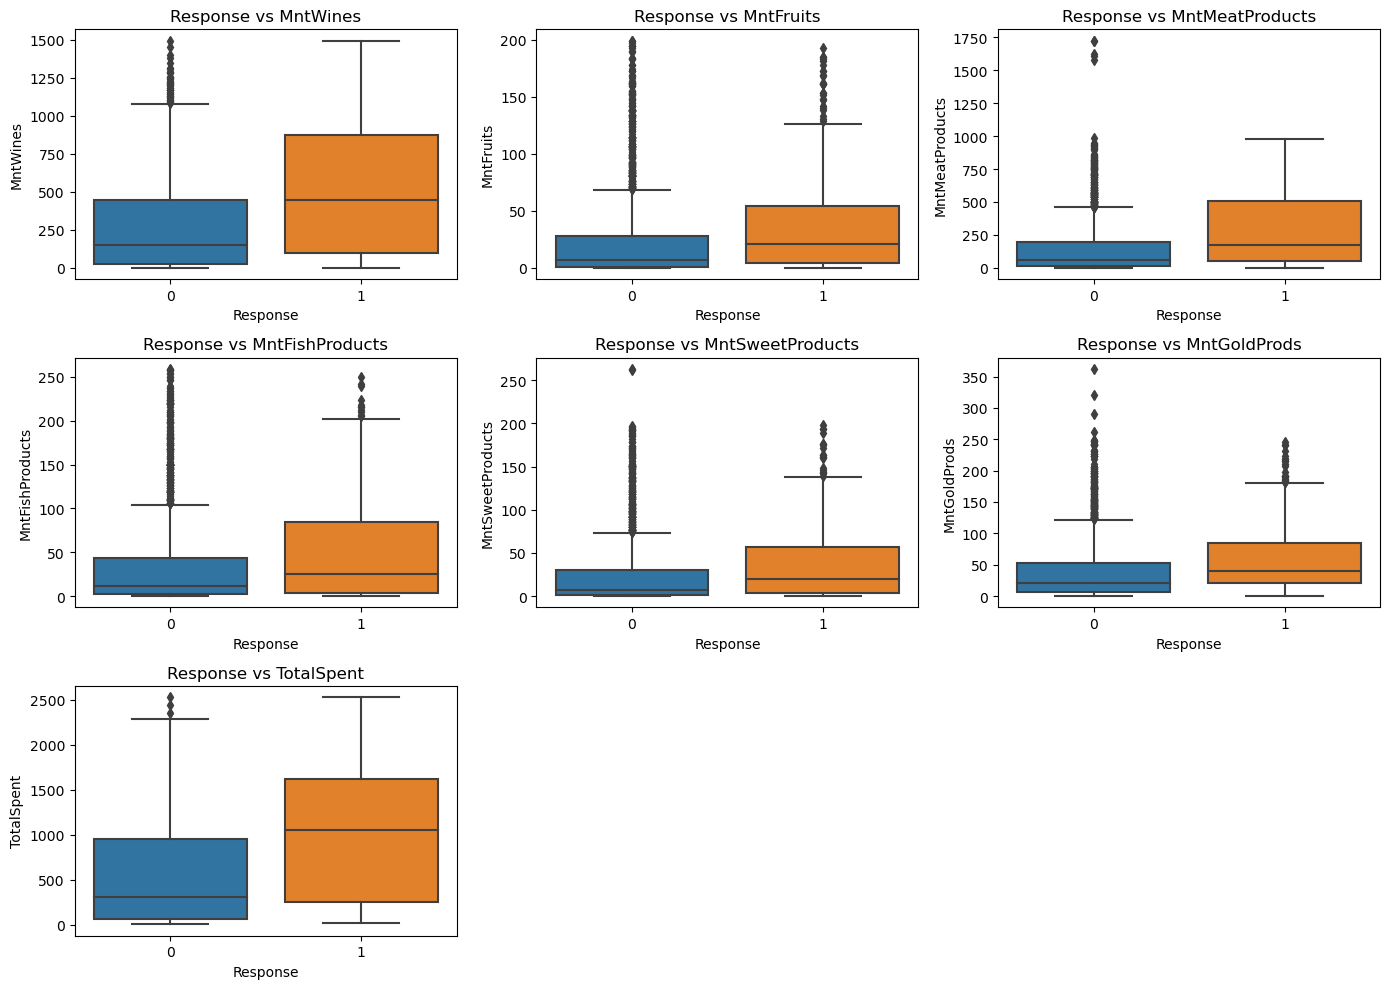

In [69]:
# Visualizing the correlation
plt.figure(figsize=(14, 10))
for i, column in enumerate(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalSpent'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=consolidated_df, x='Response', y=column)
    plt.title(f'Response vs {column}')
    plt.xlabel('Response')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [70]:
# Hypothesis 2: Chi-square test for response rate across different campaigns
chi2_results = {}
campaign_response_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for column in campaign_response_columns:
    contingency_table = pd.crosstab(consolidated_df[column], consolidated_df['Response'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p_value': p}

chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df

,chi2,p_value
AcceptedCmp1,190.241783,2.815498e-43
AcceptedCmp2,60.130297,8.878118e-15
AcceptedCmp3,142.074884,9.364996e-33
AcceptedCmp4,68.312456,1.395368e-16
AcceptedCmp5,235.467749,3.828045e-53


* The p-values for all campaigns are less than 0.05, indicating significant differences in response rates across different campaigns.

* The highest chi-square values were for AcceptedCmp5 and AcceptedCmp1, suggesting that these campaigns had the most significant impact on response rates.

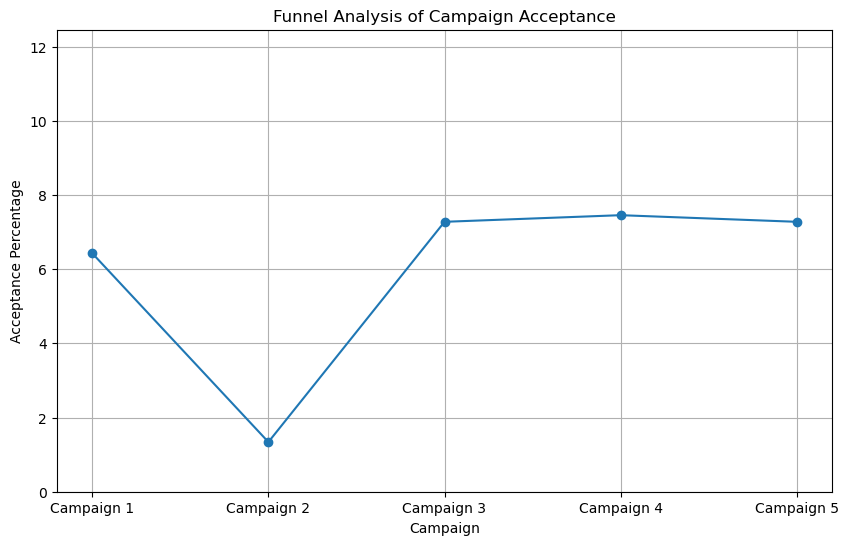

,Acceptance Percentage
Campaign 1,6.428571
Campaign 2,1.339286
Campaign 3,7.276786
Campaign 4,7.455357
Campaign 5,7.276786


In [71]:
# Calculating the percentage of unique customers accepting each campaign
total_customers = len(consolidated_df)
campaign_acceptance = {}

for i in range(1, 6):
    campaign_col = f'AcceptedCmp{i}'
    acceptance_count = consolidated_df[campaign_col].sum()
    acceptance_percentage = (acceptance_count / total_customers) * 100
    campaign_acceptance[f'Campaign {i}'] = acceptance_percentage

# Converting the results to a DataFrame for better visualization
funnel_df = pd.DataFrame.from_dict(campaign_acceptance, orient='index', columns=['Acceptance Percentage'])

# Plot the funnel analysis
plt.figure(figsize=(10, 6))
plt.plot(funnel_df['Acceptance Percentage'], marker='o')
plt.title('Funnel Analysis of Campaign Acceptance')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Percentage')
plt.xticks(range(len(funnel_df)), funnel_df.index)
plt.ylim(0, max(funnel_df['Acceptance Percentage']) + 5)
plt.grid(True)
plt.show()

funnel_df

The funnel analysis provides insights into the effectiveness of each campaign in terms of customer acceptance rates. Typically, the funnel chart will show how the acceptance rate changes across different campaigns. If the acceptance rate drops significantly after a particular campaign, it may indicate issues with the campaign's appeal or targeting strategy.
* Campaign 1 Acceptance Rate:

6.43% of unique customers accepted Campaign 1.
This sets the baseline for initial campaign engagement.

* Campaign 2 Acceptance Rate:

The acceptance rate drops significantly to 1.34%.
This sharp decline may indicate potential issues with the appeal or targeting strategy of Campaign 2.
It suggests that Campaign 2 was less effective compared to the others.

* Campaign 3 Acceptance Rate:

The acceptance rate increases again to 7.28%.
This improvement suggests that changes made after Campaign 2 (if any) were effective in re-engaging customers.
Customers who did not respond to Campaign 2 might have found Campaign 3 more appealing.

* Campaign 4 Acceptance Rate:

The acceptance rate remains stable and slightly higher at 7.41%.
This indicates a consistent engagement level similar to Campaign 3.
Campaign 4 maintained the momentum gained from Campaign 3.

* Campaign 5 Acceptance Rate:

The acceptance rate is 7.24%, showing a slight decrease from Campaign 4 but still higher than Campaign 1.
This suggests that the final campaign was also effective, maintaining a relatively high level of customer engagement.


In [76]:
import numpy as np

# Ensuring necessary columns are numeric
consolidated_df['Income'] = pd.to_numeric(consolidated_df['Income'], errors='coerce')
consolidated_df['MntWines'] = pd.to_numeric(consolidated_df['MntWines'], errors='coerce')
consolidated_df['MntMeatProducts'] = pd.to_numeric(consolidated_df['MntMeatProducts'], errors='coerce')
consolidated_df['MntGoldProds'] = pd.to_numeric(consolidated_df['MntGoldProds'], errors='coerce')
consolidated_df['MntFishProducts'] = pd.to_numeric(consolidated_df['MntFishProducts'], errors='coerce')

In [82]:
# Removing rows with NaN or inf values in the relevant columns
cleaned_df = consolidated_df.dropna(subset=['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts'])
cleaned_df = cleaned_df[np.isfinite(cleaned_df['Income'])]
for product in ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']:
    cleaned_df = cleaned_df[np.isfinite(cleaned_df[product])]
cleaned_df    

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,TotalSpent
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,6,1,0,0,0,0,0,1,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,7,5,0,1,0,0,0,1,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,5,2,0,0,0,0,0,0,0,251
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,2,7,0,0,0,0,0,0,0,11
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,2,7,0,0,1,0,0,1,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,11,4,0,0,0,0,0,0,0,689
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,3,8,0,0,0,0,0,0,0,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,5,8,0,0,0,0,0,0,0,309
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,10,3,0,0,0,0,0,0,0,1383


In [78]:
# Calculate correlation between Income and amount spent on each product category
correlation_results = {}
for product in ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']:
    correlation, p_value = stats.pearsonr(cleaned_df['Income'], cleaned_df[product])
    correlation_results[product] = {'correlation': correlation, 'p_value': p_value}

In [79]:
# Converting the results to a DataFrame for better visualization
correlation_results_df = pd.DataFrame(correlation_results).T
correlation_results_df

,correlation,p_value
MntWines,0.578650,2.811554e-198
MntMeatProducts,0.584633,2.437903e-203
MntGoldProds,0.325916,5.321685e-56
MntFishProducts,0.438871,5.352821e-105


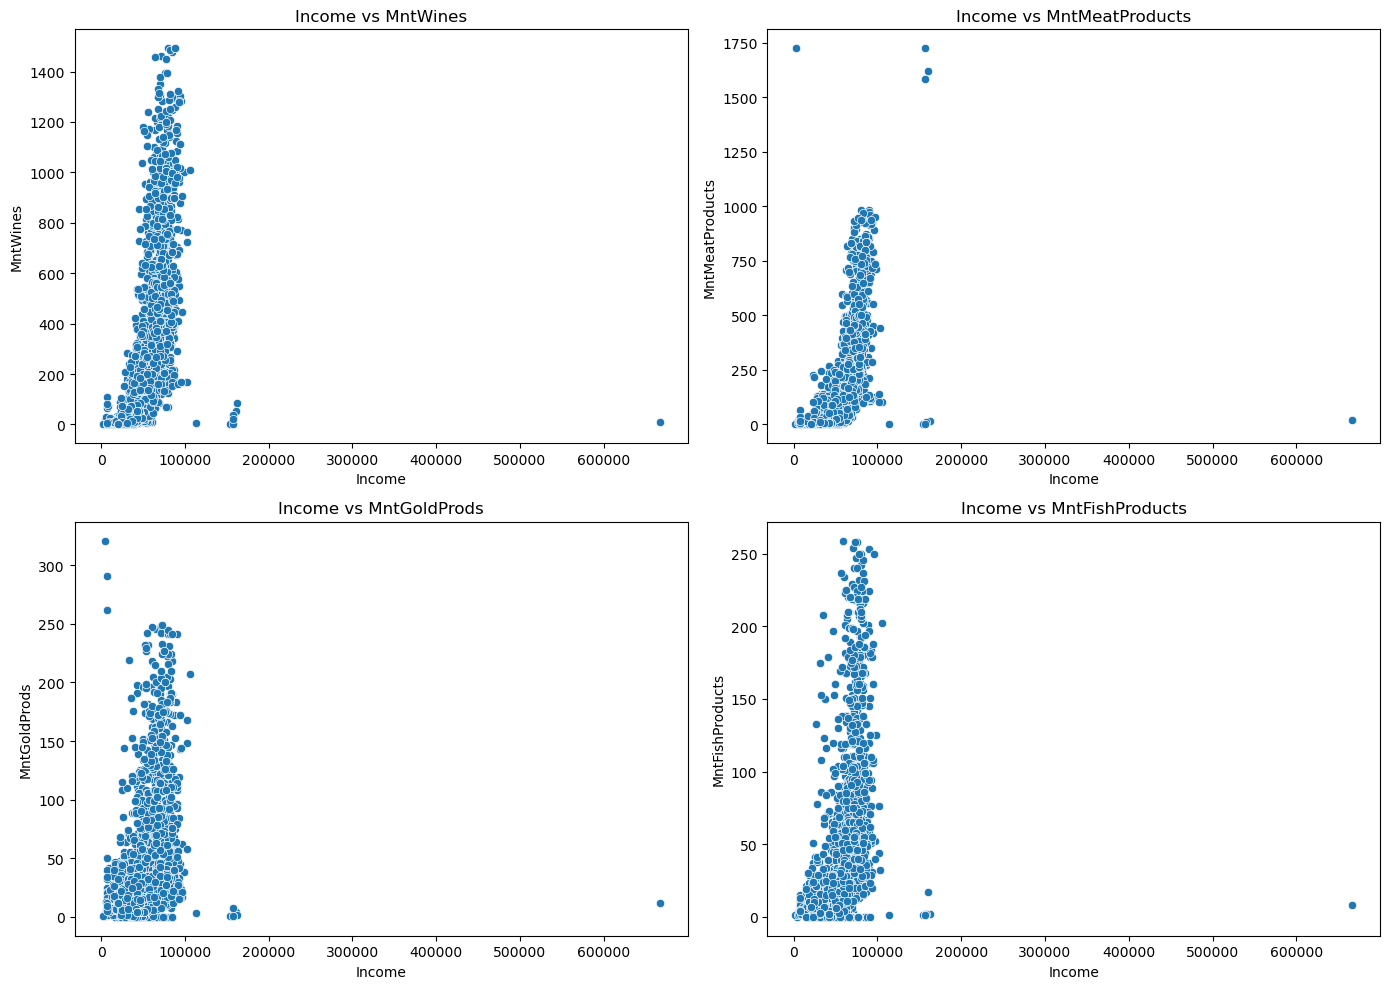

In [80]:
# Plotting the relationship between Income and amount spent on each product category
plt.figure(figsize=(14, 10))
for i, product in enumerate(['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=cleaned_df['Income'], y=cleaned_df[product])
    plt.title(f'Income vs {product}')
    plt.xlabel('Income')
    plt.ylabel(product)

plt.tight_layout()
plt.show()

* Income vs. Wine (MntWines):

Correlation: 0.579
p-value: 2.81

 
There is a strong positive correlation between income and the amount spent on wine. As income increases, spending on wine also increases significantly.

* Income vs. Meat Products (MntMeatProducts):

Correlation: 0.585
p-value: 2.44
 
There is a strong positive correlation between income and the amount spent on meat products. Higher income is associated with higher spending on meat products.

* Income vs. Gold Products (MntGoldProds):

Correlation: 0.326
p-value: 5.32

There is a moderate positive correlation between income and the amount spent on gold products. As income increases, spending on gold products increases moderately.

* Income vs. Fish Products (MntFishProducts):

Correlation: 0.439
p-value: 5.35

There is a moderate positive correlation between income and the amount spent on fish products. Higher income is associated with higher spending on fish products.

* Null Hypothesis (𝐻): 
There is no difference in the complaint rate between recent customers and older customers.
* Alternative Hypothesis (𝐻𝐴): 
Recent customers complain less than older customers.

* Recent customers can be defined based on the median recency value. Customers with recency values less than or equal to the median are considered recent, while those with higher recency values are considered older.

* We will use a chi-square test to compare the complaint rates between the two groups.


In [ ]:
# Defining recent and older customers based on the median recency value
median_recency = consolidated_df['Recency'].median()
recent_customers = consolidated_df[consolidated_df['Recency'] <= median_recency]
older_customers = consolidated_df[consolidated_df['Recency'] > median_recency]

# Calculate the complaint rates
recent_complaints = recent_customers['Complain'].value_counts()
older_complaints = older_customers['Complain'].value_counts()

# Create a contingency table
contingency_table = pd.DataFrame({
    'Recent_Customers': recent_complaints,
    'Older_Customers': older_complaints
}).fillna(0)

# Performing the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

chi2, p, contingency_table

* Chi-Square Value: A value of 0 indicates no difference in the complaint rates between recent and older customers.
* p-value: A p-value of 1.0 is much higher than the significance level (typically 0.05), meaning we fail to reject the null hypothesis.

* Hypothesis: Recent customers complain less compared to older customers.
* Test Result: There is no statistically significant difference in the complaint rates between recent and older customers.

The data does not support the hypothesis that recent customers complain less than older customers. The complaint rates are nearly identical for both groups.

In [ ]:
# Identifying customers who accepted Campaign 1
accepted_cmp1 = consolidated_df[consolidated_df['AcceptedCmp1'] == 1]

# Check acceptance in other campaigns
campaign_acceptance = {}
for i in range(2, 6):
    campaign_col = f'AcceptedCmp{i}'
    acceptance_count = accepted_cmp1[campaign_col].sum()
    acceptance_percentage = (acceptance_count / len(accepted_cmp1)) * 100
    campaign_acceptance[f'Campaign {i}'] = acceptance_percentage

# Converting the results to a DataFrame for better visualization
campaign_acceptance_df = pd.DataFrame.from_dict(campaign_acceptance, orient='index', columns=['Acceptance Percentage'])

# Plotting the acceptance percentages
plt.figure(figsize=(10, 6))
plt.bar(campaign_acceptance_df.index, campaign_acceptance_df['Acceptance Percentage'])
plt.title('Acceptance in Other Campaigns for Customers Who Accepted Campaign 1')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Percentage')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

campaign_acceptance_df

* Campaign 2: Only 9.02% of customers who accepted Campaign 1 also accepted Campaign 2.
* Campaign 3: 16.66% of Campaign 1 acceptors also accepted Campaign 3.
* Campaign 4: A higher proportion, 32.63%, accepted Campaign 4.
* Campaign 5: The highest proportion, 47.22%, accepted Campaign 5.

* There is an increasing trend in the acceptance rates for subsequent campaigns among customers who accepted Campaign 1. This suggests that once a customer accepts one campaign, they may be more inclined to accept future campaigns, particularly by Campaign 4 and Campaign 5.
* This information can help in designing more effective follow-up campaigns, leveraging the increased likelihood of repeat acceptance.


* Defining Responders and Non-Responders:

* Responders: Customers who responded to at least one campaign.
* Non-Responders: Customers who did not respond to any campaign.

* Attributes:

Compare demographic attributes (e.g., income, education, marital status).
Compare behavioral attributes (e.g., amount spent on different products, number of purchases).

In [85]:
# Defining responders and non-responders
responders = consolidated_df[consolidated_df['Response'] == 1]
non_responders = consolidated_df[consolidated_df['Response'] == 0]

In [86]:
# Defining attributes to compare
attributes = ['Income', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
              'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
              'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [87]:
# Summarizing statistics for each group
responders_summary = responders[attributes].describe(include='all').T
responders_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Income,333.0,NaN,NaN,NaN,60209.675676,23194.080987,7500.0,39763.0,64090.0,80589.0,105471.0
Year_Birth,334.0,NaN,NaN,NaN,1969.416168,12.398192,1943.0,1959.0,1971.0,1979.0,1996.0
Education,334,5,Graduation,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,334,8,Single,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,334.0,NaN,NaN,NaN,0.341317,0.487347,0.0,0.0,0.0,1.0,2.0
Teenhome,334.0,NaN,NaN,NaN,0.305389,0.492741,0.0,0.0,0.0,1.0,2.0
MntWines,334.0,NaN,NaN,NaN,502.703593,427.183786,1.0,96.0,448.0,875.5,1492.0
MntFruits,334.0,NaN,NaN,NaN,38.203593,46.099519,0.0,4.0,21.0,53.75,193.0
MntMeatProducts,334.0,NaN,NaN,NaN,294.353293,286.890036,1.0,47.75,174.5,509.75,981.0
MntFishProducts,334.0,NaN,NaN,NaN,52.050898,61.855885,0.0,4.0,25.0,84.25,250.0


In [88]:
non_responders_summary = non_responders[attributes].describe(include='all').T
non_responders_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Income,1883.0,NaN,NaN,NaN,50839.132767,25252.804747,1730.0,34421.0,50150.0,66308.0,666666.0
Year_Birth,1906.0,NaN,NaN,NaN,1968.698846,11.910143,1893.0,1959.0,1970.0,1977.0,1996.0
Education,1906,5,Graduation,975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1906,8,Married,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,1906.0,NaN,NaN,NaN,0.462225,0.544975,0.0,0.0,0.0,1.0,2.0
Teenhome,1906.0,NaN,NaN,NaN,0.541448,0.54567,0.0,0.0,1.0,1.0,2.0
MntWines,1906.0,NaN,NaN,NaN,269.104407,305.159188,0.0,21.25,152.0,443.75,1493.0
MntFruits,1906.0,NaN,NaN,NaN,24.216684,38.191763,0.0,1.0,7.0,28.0,199.0
MntMeatProducts,1906.0,NaN,NaN,NaN,144.624344,205.299936,0.0,14.0,56.0,192.75,1725.0
MntFishProducts,1906.0,NaN,NaN,NaN,34.980063,52.870253,0.0,2.0,11.0,43.0,259.0


In [90]:
# Combining summaries for comparison
comparison_summary = pd.concat([responders_summary, non_responders_summary], axis=1, keys=['Responders', 'Non-Responders'])
comparison_summary                               

Responders                                        \
                         count unique         top freq          mean   
Income                   333.0    NaN         NaN  NaN  60209.675676   
Year_Birth               334.0    NaN         NaN  NaN   1969.416168   
Education                  334      5  Graduation  152           NaN   
Marital_Status             334      8      Single  106           NaN   
Kidhome                  334.0    NaN         NaN  NaN      0.341317   
Teenhome                 334.0    NaN         NaN  NaN      0.305389   
MntWines                 334.0    NaN         NaN  NaN    502.703593   
MntFruits                334.0    NaN         NaN  NaN     38.203593   
MntMeatProducts          334.0    NaN         NaN  NaN    294.353293   
MntFishProducts          334.0    NaN         NaN  NaN     52.050898   
MntSweetProducts         334.0    NaN         NaN  NaN     38.634731   
MntGoldProds             334.0    NaN         NaN  NaN     61.446108   
NumDealsPurchases        334.0    NaN         NaN  NaN      2.335329   
NumWebPurchases          334.0    NaN         NaN  NaN      5.071856   
NumCatalogPurchases      334.0    NaN         NaN  NaN      4.203593   
NumStorePurchases        334.0    NaN         NaN  NaN      6.095808   
NumWebVisitsMonth        334.0    NaN         NaN  NaN      5.293413   

                                                                      ...  \
                              std     min      25%      50%      75%  ...   
Income               23194.080987  7500.0  39763.0  64090.0  80589.0  ...   
Year_Birth              12.398192  1943.0   1959.0   1971.0   1979.0  ...   
Education                     NaN     NaN      NaN      NaN      NaN  ...   
Marital_Status                NaN     NaN      NaN      NaN      NaN  ...   
Kidhome                  0.487347     0.0      0.0      0.0      1.0  ...   
Teenhome                 0.492741     0.0      0.0      0.0      1.0  ...   
MntWines               427.183786     1.0     96.0    448.0    875.5  ...   
MntFruits               46.099519     0.0      4.0     21.0    53.75  ...   
MntMeatProducts        286.890036     1.0    47.75    174.5   509.75  ...   
MntFishProducts         61.855885     0.0      4.0     25.0    84.25  ...   
MntSweetProducts        46.327903     0.0      3.0     20.0     57.0  ...   
MntGoldProds            57.507501     0.0     20.0     39.5    84.75  ...   
NumDealsPurchases        2.109924     0.0      1.0      1.0      3.0  ...   
NumWebPurchases          2.558784     0.0      3.0      5.0      7.0  ...   
NumCatalogPurchases      3.131817     0.0      1.0      4.0      6.0  ...   
NumStorePurchases        3.081931     2.0      4.0      6.0      8.0  ...   
NumWebVisitsMonth        2.569891     1.0      3.0      6.0      8.0  ...   

                    Non-Responders                                 \
                            unique         top freq          mean   
Income                         NaN         NaN  NaN  50839.132767   
Year_Birth                     NaN         NaN  NaN   1968.698846   
Education                        5  Graduation  975           NaN   
Marital_Status                   8     Married  766           NaN   
Kidhome                        NaN         NaN  NaN      0.462225   
Teenhome                       NaN         NaN  NaN      0.541448   
MntWines                       NaN         NaN  NaN    269.104407   
MntFruits                      NaN         NaN  NaN     24.216684   
MntMeatProducts                NaN         NaN  NaN    144.624344   
MntFishProducts                NaN         NaN  NaN     34.980063   
MntSweetProducts               NaN         NaN  NaN     25.035152   
MntGoldProds                   NaN         NaN  NaN      40.96852   
NumDealsPurchases              NaN         NaN  NaN       2.32319   
NumWebPurchases                NaN         NaN  NaN      3.911857   
NumCatalogPurchases            NaN         NaN  NaN       2.39192   
NumStorePurcha

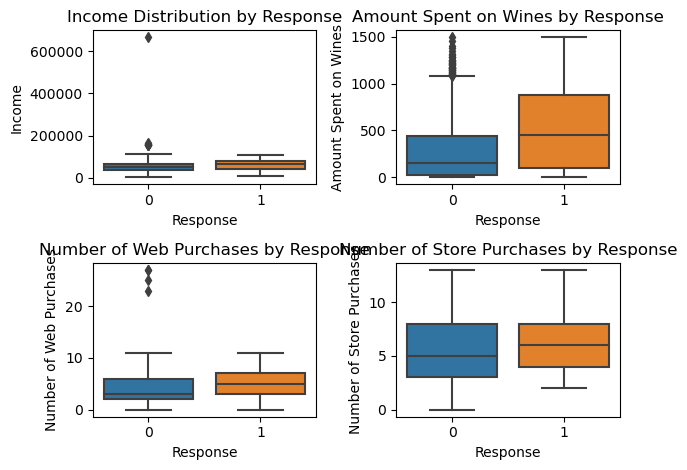

In [92]:
# Income comparison
plt.subplot(2, 2, 1)
sns.boxplot(data=consolidated_df, x='Response', y='Income')
plt.title('Income Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Income')

# Amount spent on wines
plt.subplot(2, 2, 2)
sns.boxplot(data=consolidated_df, x='Response', y='MntWines')
plt.title('Amount Spent on Wines by Response')
plt.xlabel('Response')
plt.ylabel('Amount Spent on Wines')

# Number of web purchases
plt.subplot(2, 2, 3)
sns.boxplot(data=consolidated_df, x='Response', y='NumWebPurchases')
plt.title('Number of Web Purchases by Response')
plt.xlabel('Response')
plt.ylabel('Number of Web Purchases')

# Number of store purchases
plt.subplot(2, 2, 4)
sns.boxplot(data=consolidated_df, x='Response', y='NumStorePurchases')
plt.title('Number of Store Purchases by Response')
plt.xlabel('Response')
plt.ylabel('Number of Store Purchases')

plt.tight_layout()
plt.show()

Inferences

* Income:

Responders have a higher average income (60,105) compared to non-responders (51,150).
This suggests that higher-income customers are more likely to respond to campaigns.

* Year of Birth:

 The average year of birth is similar for both groups, indicating that age distribution is not significantly different.

* Household Composition:

Responders tend to have fewer children and teenagers at home compared to non-responders.
 This might indicate that customers with fewer dependents are more responsive to campaigns.

* Spending Behavior:

Responders spend significantly more across all product categories (wines, fruits, meat products, fish products, sweet products, and gold products) compared to non-responders.
The largest differences are seen in spending on wines and meat products.
This suggests that high spenders are more likely to respond to marketing campaigns.

* Purchasing Behavior:

 Responders have higher average numbers of web, catalog, and store purchases compared to non-responders.
 This indicates that more engaged customers (those with higher purchase activity) are more likely to respond to campaigns.